## imports 

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

## Data Analysis & Visulization 

In [3]:
rain_df = pd.read_csv('weatherAUS.csv')
rain_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rain_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<AxesSubplot:xlabel='Temp3pm', ylabel='Count'>

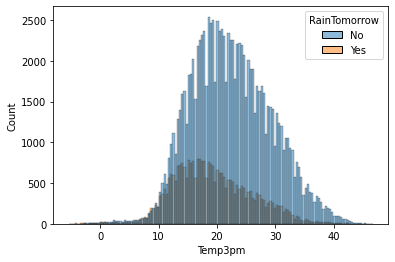

In [6]:
sns.histplot(rain_df, x='Temp3pm', 
            hue='RainTomorrow')

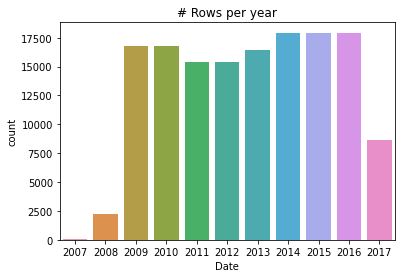

In [7]:
plt.title("# Rows per year")
sns.countplot(x=pd.to_datetime(rain_df.Date).dt.year);

In [8]:
rain_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [9]:
year = pd.to_datetime(rain_df.Date).dt.year
train_df, val_df, test_df = rain_df[year < 2015], rain_df[year == 2015], rain_df[year > 2015]

In [10]:
print(train_df.shape, val_df.shape, test_df.shape)

(97988, 23) (17089, 23) (25710, 23)


In [11]:
input_col = list(rain_df.columns[1:-1])
target_col = 'RainTomorrow'

train_input, train_target = train_df[input_col].copy(), train_df[target_col].copy()
val_input, val_target = val_df[input_col].copy(), val_df[target_col].copy()
test_input, test_target = test_df[input_col].copy(), test_df[target_col].copy()
rain_df_input, rain_df_target = rain_df[input_col].copy(), rain_df[target_col].copy()

In [12]:
numeric_cols = train_input.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_col = train_input.select_dtypes('object').columns.tolist()

In [13]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am']

In [14]:
categorical_col

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [15]:
imputer = SimpleImputer(strategy='mean').fit(rain_df[numeric_cols])

train_input[numeric_cols] = imputer.transform(train_input[numeric_cols])
val_input[numeric_cols] = imputer.transform(val_input[numeric_cols])
test_input[numeric_cols] = imputer.transform(test_input[numeric_cols])
rain_df[numeric_cols] = imputer.transform(rain_df[numeric_cols])

In [16]:
scaler = MinMaxScaler().fit(rain_df[numeric_cols])

train_input[numeric_cols] = scaler.transform(train_input[numeric_cols])
val_input[numeric_cols] = scaler.transform(val_input[numeric_cols])
test_input[numeric_cols] = scaler.transform(test_input[numeric_cols])
rain_df_input[numeric_cols] = scaler.transform(rain_df_input[numeric_cols])

In [17]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(rain_df[categorical_col])
enc_col = list(enc.get_feature_names(categorical_col))

train_input[enc_col] = enc.transform(train_input[categorical_col]) 
val_input[enc_col] = enc.transform(val_input[categorical_col])
test_input[enc_col] = enc.transform(test_input[categorical_col])
rain_df_input[enc_col] = enc.transform(rain_df_input[categorical_col])

/home/gaurang/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/tmp/ipykernel_161910/70283906.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_input[enc_col] = enc.transform(train_input[categorical_col])
/tmp/ipykernel_161910/70283906.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_in

In [18]:
train_input.to_parquet('train_inputs.parpuet')
val_input.to_parquet('val_inputs.parpuet')
test_input.to_parquet('test_inputs.parpuet')
rain_df_input.to_parquet('weather_inputs.parpuet')

pd.DataFrame(train_target).to_parquet('train_targets.parpuet')
pd.DataFrame(val_target).to_parquet('val_targets.parpuet')
pd.DataFrame(test_target).to_parquet('test_targets.parpuet')
pd.DataFrame(rain_df_target).to_parquet('weather_targets.parpuet')

## Model Training and Evaluation 

### For entire dataset

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

In [20]:
train_input = train_input[numeric_cols+enc_col]
val_input = val_input[numeric_cols+enc_col]
test_input = test_input[numeric_cols+enc_col]

In [21]:
%%time
model = LogisticRegression(solver='liblinear')
model.fit(train_input, train_target)

CPU times: user 1.31 s, sys: 55 ms, total: 1.36 s
Wall time: 1.37 s


LogisticRegression(solver='liblinear')

In [22]:
def predict_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    # probs = model.predict_proba(targets)
    acc = accuracy_score(targets, preds)*100
    print(f'Accuracy: {acc}')

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Predictions')
    plt.ylabel('Target')
    plt.title(f'Confusion Matric: {name}')
    return preds

Accuracy: 85.4058166071742


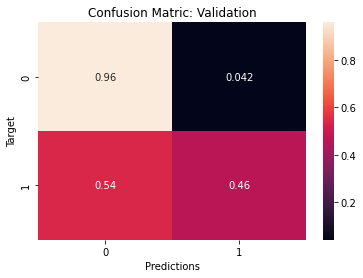

In [23]:
val_preds = predict_plot(val_input, val_target, 'Validation');

Accuracy: 84.24737456242707


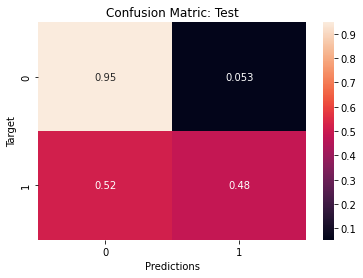

In [24]:
test_preds = predict_plot(test_input, test_target, 'Test');

## Saving Model 

In [25]:
weather_pred_model = {'model': model, 
                    'imputer': imputer, 'scaler': scaler, 'encoder': enc,
                    'input_cols': input_col, 'target_col': target_col, 
                    'numeric_cols': numeric_cols, 'categorical_cols': categorical_col, 
                    'encoded_cols': enc_col}

In [26]:
joblib.dump(weather_pred_model, 'Weather_pred.joblib')

['Weather_pred.joblib']

Model has been been reloaded in 